# Assignment-1

## Topic: Mathematical theory on Linear Regression

**Author:**
AHMED SHMELS MUHE (GE22M009)

In this notebook, we are going to analyse the data given by the client will try to answer whether low income groups are at greater risk for being diagnosed and dieing from Cancer.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the necessary libraries for data preprocessing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
path = '/content/drive/MyDrive/EE4708_Data_Lab/DA-1/' #REPLACE PATH WITH PATH TO DATASETS

## Dropping unnamed column

In [3]:
df = pd.read_excel(path+'merged_data.xlsx', na_values=['*','_', '__', ' '])
df.drop('Unnamed: 0', axis=1, inplace=True) 
print("Shape of dataframe ", df.shape)
df.isna().sum()/df.shape[0]*100 

Shape of dataframe  (3134, 25)


State                 0.000000
AreaName              0.000000
All_Poverty           0.000000
M_Poverty             0.000000
F_Poverty             0.000000
FIPS                  0.000000
Med_Income            0.031908
Med_Income_White      0.063816
Med_Income_Black     38.608807
Med_Income_Nat_Am    52.967454
Med_Income_Asian     56.062540
Hispanic             21.729419
M_With                0.000000
M_Without             0.000000
F_With                0.000000
F_Without             0.000000
All_With              0.000000
All_Without           0.000000
fips_x                0.000000
Incidence_Rate       13.401404
Avg_Ann_Incidence     6.668794
recent_trend         14.901085
fips_y                0.000000
Mortality_Rate       10.370134
Avg_Ann_Deaths       10.370134
dtype: float64

# Cleaning and Initial Exploratory Data Analysis


1.    dropping zipcodes

2.   plotting heatmap with correlation between numeric features



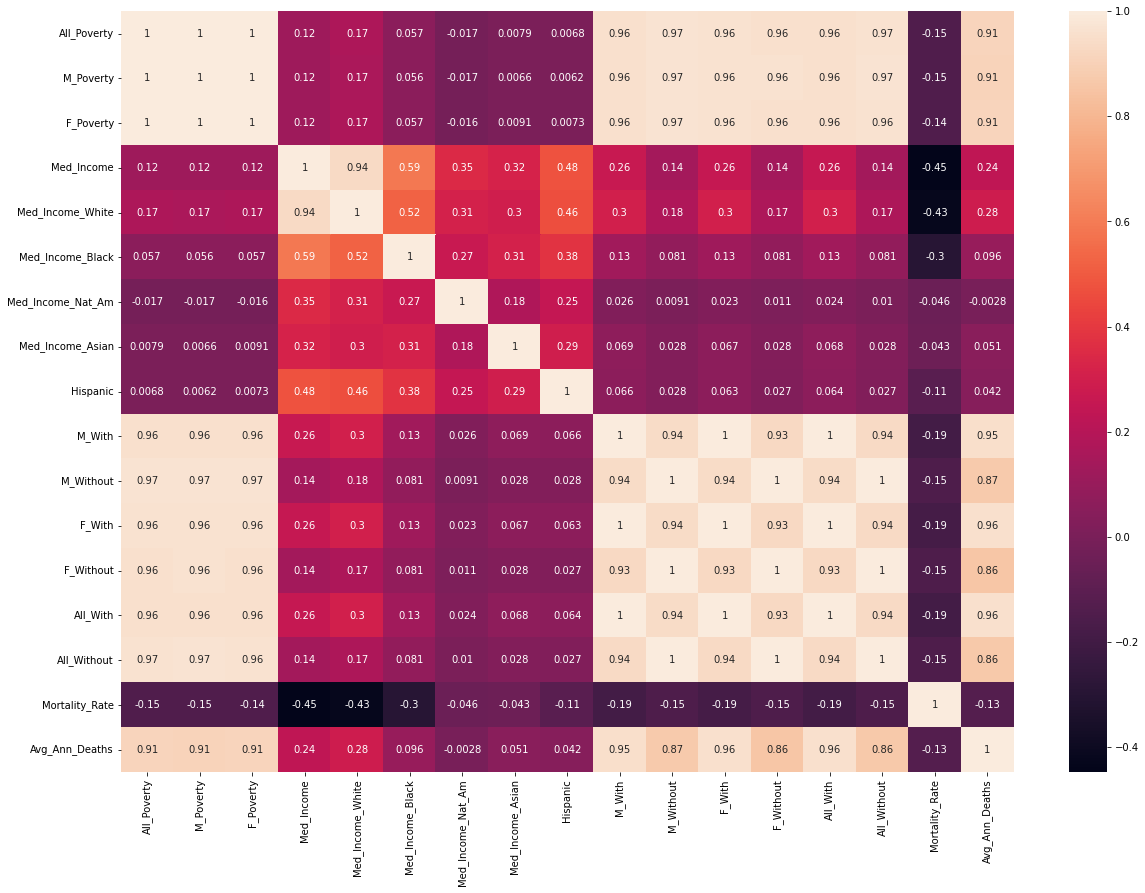

In [4]:
drop_cols = ['FIPS', 'fips_x','fips_y'] 
data = df.drop(drop_cols, axis=1)
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(), annot=True) 

In [5]:
def dist_plot(features, rows, cols, data=data, figsize=(14,12)):
  fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=True, sharey=True)
  for i,ax in enumerate(axes.flatten()):
    x=data[features[i]]
    sns.distplot(x, ax=ax)
    ax.title.set_text(features[i])
    kdeline = ax.lines[0]
    mean = x.mean()
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height, color='crimson', ls=':')
    ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
    ax.text(0.75, 0.9, "Mean: {:.2f}".format(x.mean()), 
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=ax.transAxes)
  plt.tight_layout()
  plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

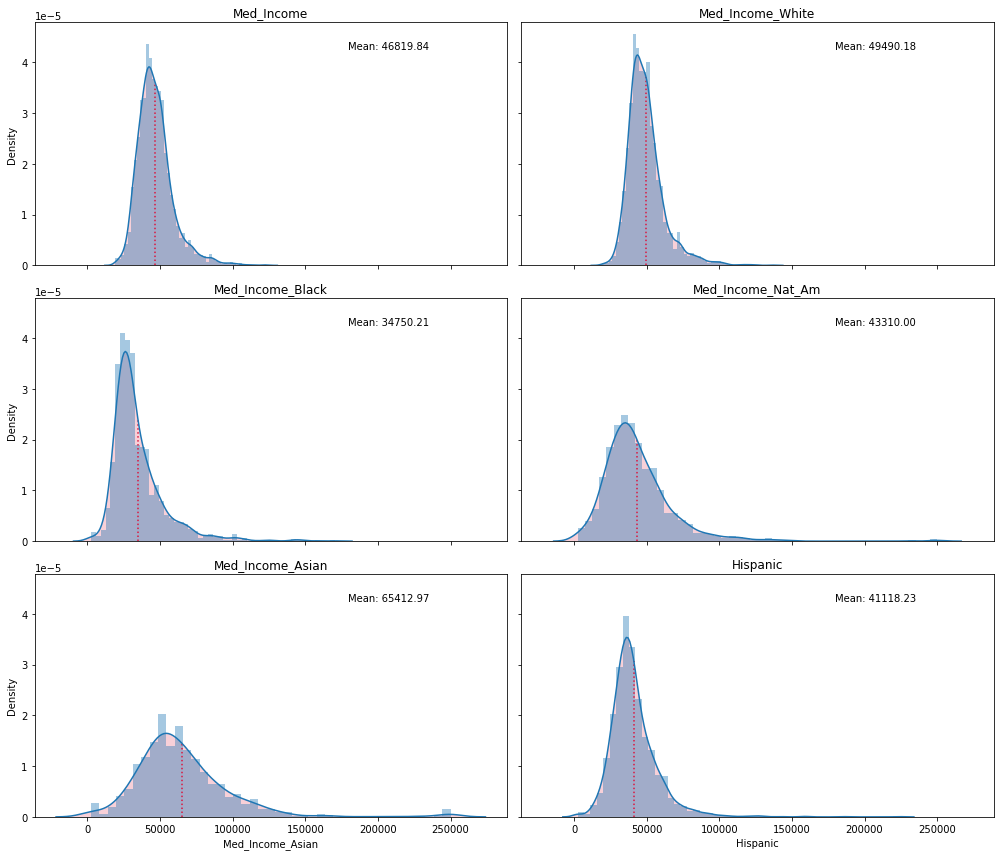

In [6]:
income = [ 'Med_Income','Med_Income_White',
       'Med_Income_Black', 'Med_Income_Nat_Am', 
       'Med_Income_Asian', 
       'Hispanic'] 
dist_plot(income, 3,2)

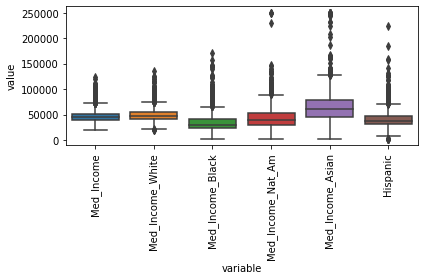

In [7]:
ax = sns.boxplot(x='variable', y='value', data=pd.melt(data[income]))  
ax.tick_params(axis='x', rotation=90)
plt.tight_layout() 

In [8]:
data['Incidence_Rate'] = data['Incidence_Rate'].astype(str).str.replace(' #', '').astype(float)  ## cleaning noisy characters from features
data['Avg_Ann_Incidence'] = data['Avg_Ann_Incidence'].astype(str).str.replace('or fewer', '').astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


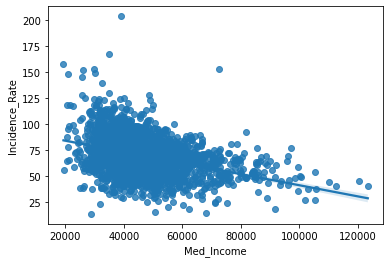

In [9]:

sns.regplot(data['Med_Income'], data['Incidence_Rate'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


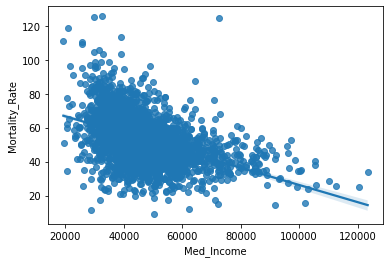

In [10]:

sns.regplot(data['Med_Income'], data['Mortality_Rate'])

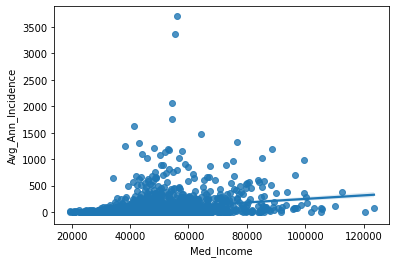

In [11]:

sns.regplot(x=data['Med_Income'], y=data['Avg_Ann_Incidence'].astype(float))

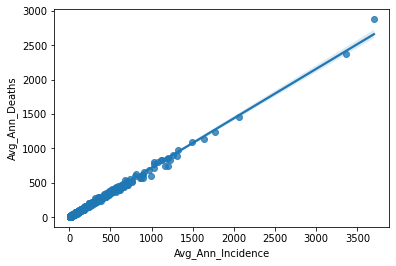

In [12]:

sns.regplot(x=data['Avg_Ann_Incidence'], y=data['Avg_Ann_Deaths'].astype(float))

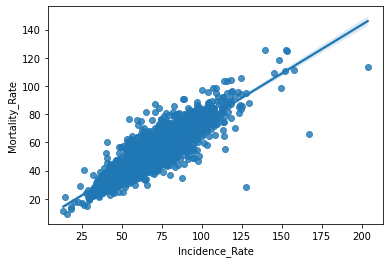

In [13]:
# plot of incidence vs mortality rates for all areas
sns.regplot(x=data['Incidence_Rate'], y=data['Mortality_Rate'].astype(float))

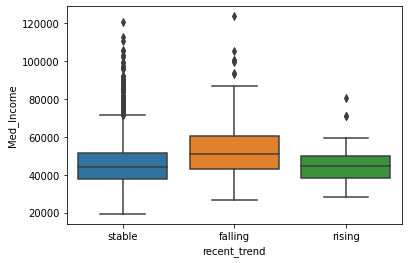

In [14]:
# boxplot for recent trend vs median income
sns.boxplot(x='recent_trend', y='Med_Income', data=data)

In [15]:

state_df = data.groupby('State').agg('mean')
state_df.sort_values(by='Mortality_Rate')

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
State,,,,,,,,,,,,,,,,,,,
UT,12124.172414,5646.620690,6477.551724,54687.034483,55952.068966,47773.875000,42278.875000,68741.818182,37441.208333,42691.068966,6939.689655,43393.172414,6177.206897,86084.241379,13116.896552,31.910526,22.241379,22.964706,24.764706
HI,30788.800000,14142.200000,16646.600000,64879.000000,63301.250000,57288.000000,51644.000000,68667.750000,53055.500000,123945.400000,8997.200000,130480.400000,7047.000000,254425.800000,16044.200000,45.400000,155.800000,32.350000,134.250000
CO,10218.265625,4729.312500,5488.953125,51263.187500,52227.531250,52339.160000,40662.096774,58136.000000,38749.483871,34745.546875,5534.781250,36322.625000,4447.265625,71068.171875,9982.046875,44.689583,35.281250,33.240000,39.075000
NM,13010.939394,6034.939394,6976.000000,40183.666667,42952.757576,38032.600000,37426.130435,67274.142857,34024.181818,25007.909091,5452.000000,26911.939394,4740.333333,51919.848485,10192.333333,44.437037,29.424242,33.730769,27.653846
AZ,78712.666667,36501.133333,42211.533333,43252.200000,45663.600000,53071.363636,35378.615385,61901.769231,38478.066667,178389.533333,35436.066667,191685.466667,30056.200000,370075.000000,65492.266667,48.366667,252.600000,35.180000,182.666667
WY,2825.869565,1255.739130,1570.130435,57042.304348,57762.086957,32669.000000,62420.111111,46094.800000,46368.200000,10802.956522,1764.608696,10670.782609,1552.869565,21473.739130,3317.478261,46.842857,12.739130,38.409524,10.857143
CA,105778.310345,48712.758621,57065.551724,56013.155172,58284.137931,46367.782609,44473.222222,68269.591837,44209.910714,269831.241379,52388.275862,287728.534483,43712.500000,557559.775862,96100.775862,51.632143,294.396552,39.374545,231.818182
DC,110365.000000,48069.000000,62296.000000,70848.000000,115890.000000,40677.000000,61985.000000,83064.000000,61087.000000,276285.000000,22198.000000,323314.000000,14813.000000,599599.000000,37011.000000,59.000000,351.000000,40.600000,240.000000
ID,5572.204545,2591.636364,2980.568182,43607.750000,44077.136364,49256.000000,37992.000000,48983.285714,39515.189189,15305.886364,2773.363636,15626.613636,2562.863636,30932.500000,5336.227273,54.005882,19.500000,41.693103,20.586207


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


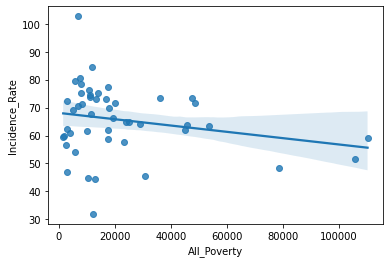

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


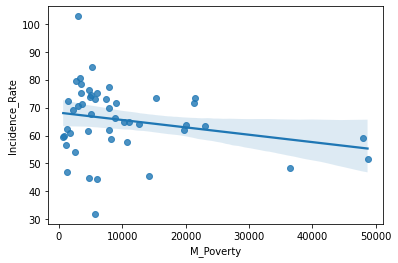

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


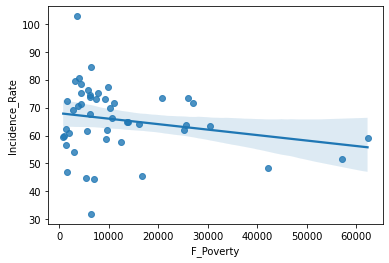

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


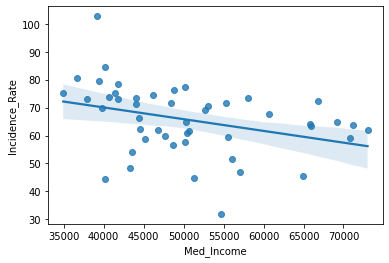

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


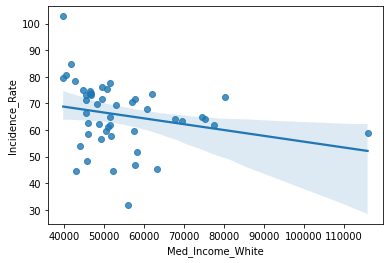

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


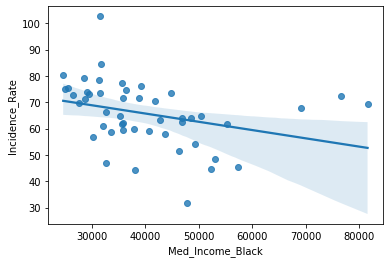

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


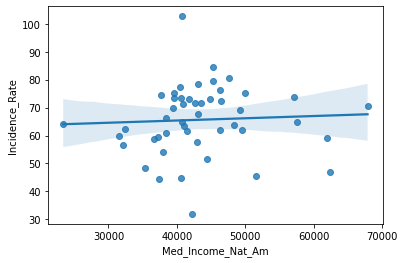

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


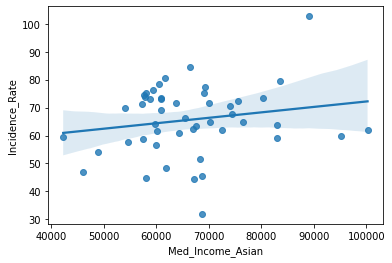

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


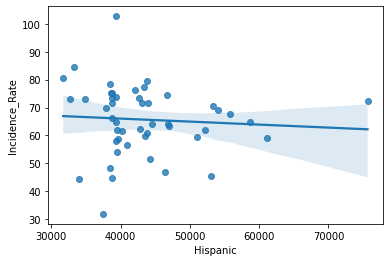

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


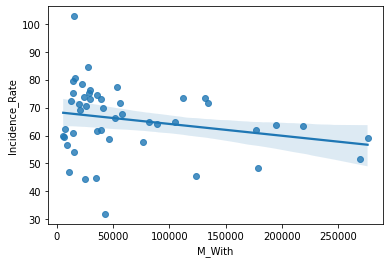

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


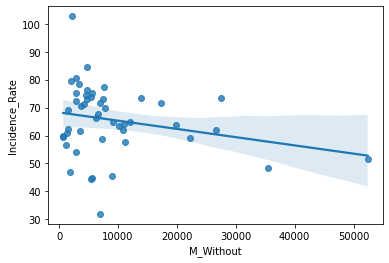

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


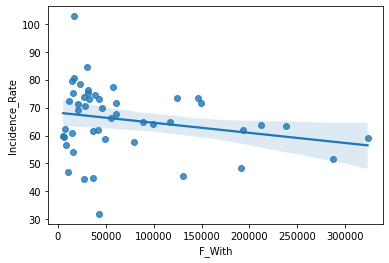

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


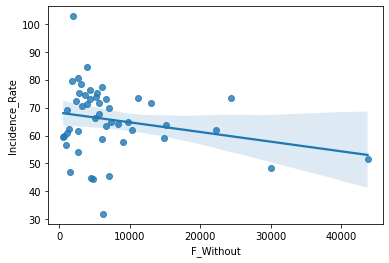

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


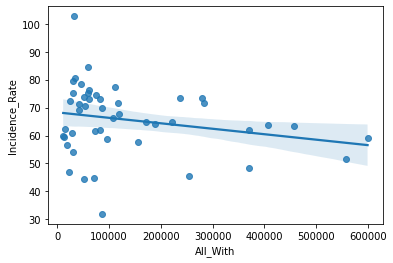

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


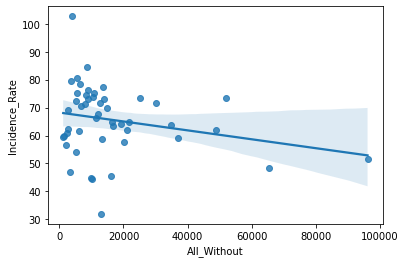

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


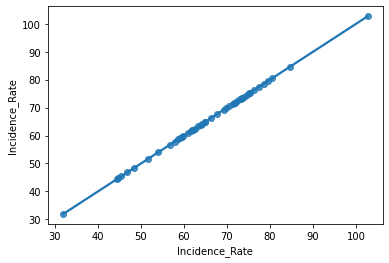

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


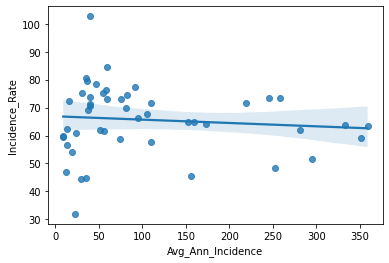

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


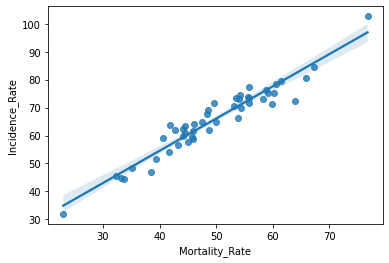

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


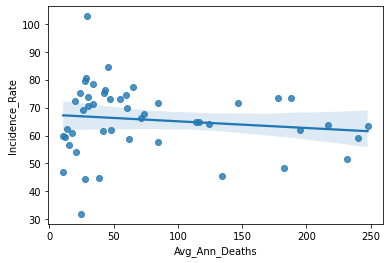

In [54]:
## plotting numeric features against incidence rate
feature = ['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income',
       'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am',
       'Med_Income_Asian', 'Hispanic', 'M_With', 'M_Without', 'F_With',
       'F_Without', 'All_With', 'All_Without', 'Incidence_Rate',
       'Avg_Ann_Incidence', 'Mortality_Rate', 'Avg_Ann_Deaths']
for i in feature:
  sns.regplot(state_df[i], state_df['Incidence_Rate'])
  #sns.barplot(state_df[i], state_df['Incidence_Rate'])
  plt.show()

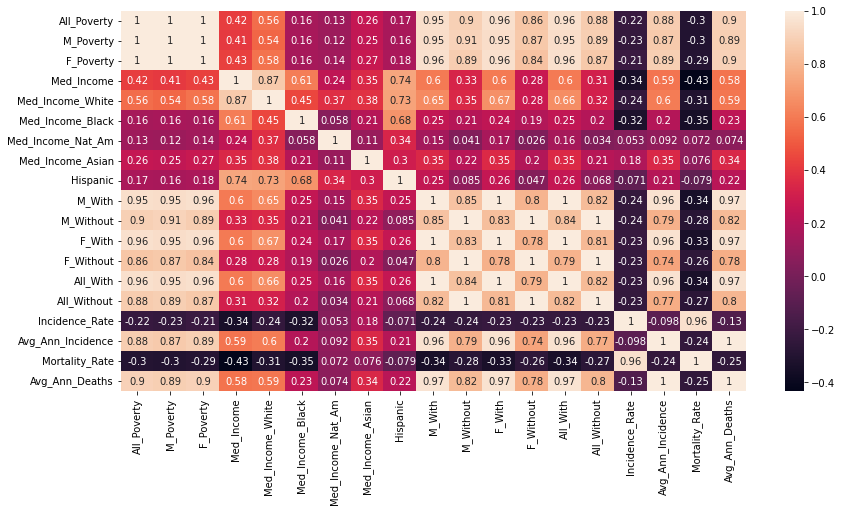

In [17]:
## plotting heatmap with correlation after cleaning of features 
plt.figure(figsize=(14,7))
sns.heatmap(state_df.corr(), annot=True)

# Further Exploratory Data Analysis


In [18]:
data = df.drop(drop_cols, axis=1)

data.columns = ['state', 'area_name', 'num_poverty', 'num_poverty_male', 'num_poverty_female',
       'median_income', 'white_income', 'black_income',
       'american_income', 'asian_income', 'hispanic_income', 'with_insurance_male',
       'without_insurance_male', 'with_insurance_female', 'without_insurance_female', 'with_insurance', 'without_insurance',
       'incidence_rate', 'avg_ann_incidence', 'recent_trend', 'mortality_rate',
       'avg_ann_deaths']   ### renaming all columns for convenience

income = ['median_income', 'white_income', 'black_income',
       'american_income', 'asian_income', 'hispanic_income'] # all features related to income
insurance = ['with_insurance_male',
       'without_insurance_male', 'with_insurance_female', 'without_insurance_female', 'with_insurance', 'without_insurance'] # all features related to insurance
rates = ['incidence_rate', 'avg_ann_incidence', 'mortality_rate',
       'avg_ann_deaths'] ## all potential dependent variables
rate2 = ['incidence_rate', 'mortality_rate'] ## dependent variables used in this study

In [19]:
for i in rates:   #### cleaning all noisy features
  data[i] = data[i].astype(str).str.replace(' #', '').str.replace(' or fewer', '').astype(float)

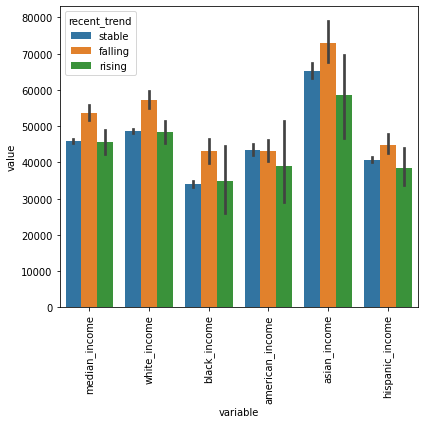

In [51]:
plt.figure(figsize=(6,6))
x = pd.melt(data[['recent_trend']+income], id_vars='recent_trend')
ax = sns.barplot(x='variable', y='value', hue='recent_trend', data=x)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [21]:
data['more_females_poor'] = (data['num_poverty_male']<data['num_poverty_female']).astype('int') 
data['more_females_poor'].value_counts()

1    2899
0     235
Name: more_females_poor, dtype: int64

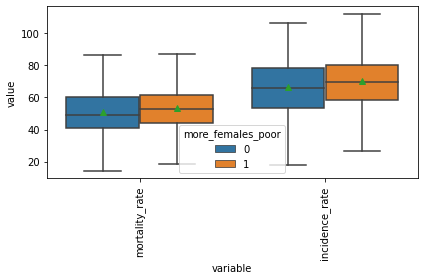

In [53]:
x = pd.melt(data[rate2+ ['more_females_poor']], id_vars='more_females_poor')
ax = sns.boxplot(x='variable', y='value', hue='more_females_poor', data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [23]:
new_cols = []  
for i in income[1:]:
  data['{}_more'.format(i)] = (data['median_income']<data[i]).astype('int')
  new_cols.append('{}_more'.format(i))

data['num_groups_above_median'] = data[new_cols].sum(axis=1) 
data['num_groups_above_median'].value_counts()

1    1502
2    1149
3     293
0     162
4      28
Name: num_groups_above_median, dtype: int64

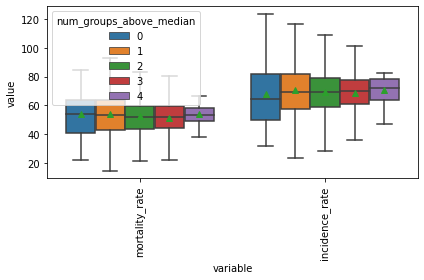

In [57]:

x = pd.melt(data[rate2+ ['num_groups_above_median']], id_vars='num_groups_above_median')
ax = sns.boxplot(x='variable', y='value', hue='num_groups_above_median', data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

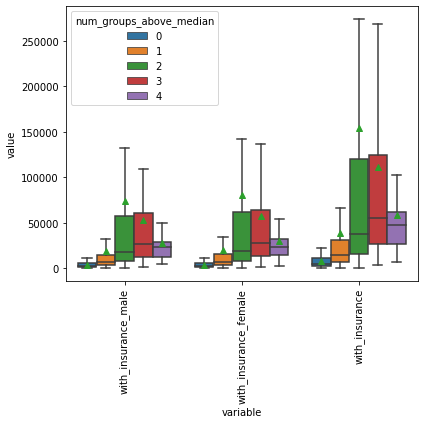

In [25]:

plt.figure(figsize=(6,6))
x = pd.melt(data[['with_insurance_male','with_insurance_female', 'with_insurance','num_groups_above_median']], id_vars='num_groups_above_median')
ax = sns.boxplot(x='variable', y='value', hue='num_groups_above_median', data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

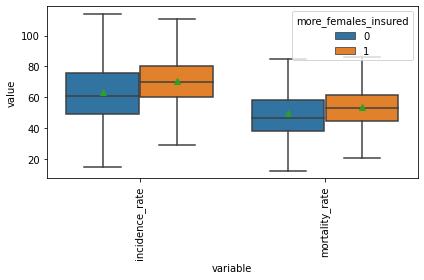

In [26]:
data['more_females_insured'] = (data['with_insurance_male']<data['with_insurance_female']).astype('int') ## creating feature with value = 1 
## when more females in an area have insurance than males
i = 'more_females_insured'
x = pd.melt(data[rate2+ [i]], id_vars=i)
ax = sns.boxplot(x='variable', y='value', hue=i, data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [27]:
data['more_females_insured'].value_counts() 

1    2590
0     544
Name: more_females_insured, dtype: int64

In [28]:

data[['state', 'more_females_insured']+rates].groupby('state').agg('mean').sort_values(by='incidence_rate').corr()

,more_females_insured,incidence_rate,avg_ann_incidence,mortality_rate,avg_ann_deaths
more_females_insured,1.000000,0.388867,0.498575,0.245097,0.477164
incidence_rate,0.388867,1.000000,-0.097523,0.960080,-0.134527
avg_ann_incidence,0.498575,-0.097523,1.000000,-0.237780,0.995588
mortality_rate,0.245097,0.960080,-0.237780,1.000000,-0.245166
avg_ann_deaths,0.477164,-0.134527,0.995588,-0.245166,1.000000


In [29]:

data['total_male'] = data['with_insurance_male']+data['without_insurance_male'] 

In [30]:
x = data['with_insurance_female']+data['without_insurance_female']
y = data['with_insurance_male']+data['without_insurance_male']
print(((x+y)==(data['with_insurance']+data['without_insurance'])).value_counts()) 
data['female_ratio'] = x/(x+y) 
data['male_ratio']=y/(x+y)
total_people = x+y
data['more_females'] = (data['male_ratio']<data['female_ratio']).astype('int') 
data['more_females'].value_counts()

True    3134
dtype: int64


1    2316
0     818
Name: more_females, dtype: int64

In [31]:
x1 = data['num_poverty_female']/x
y1 = data['num_poverty_male']/y 
print(((data['num_poverty_female']+data['num_poverty_male'])==data['num_poverty']).value_counts()) 

data['poverty_female_ratio'] = x1 
data['poverty_male_ratio']=y1
data['total_population'] = x+y
data['more_females_poor'] = (data['poverty_male_ratio']<data['poverty_female_ratio']).astype('int')
data['poverty_ratio'] = data['num_poverty']/total_people

True    3134
dtype: int64


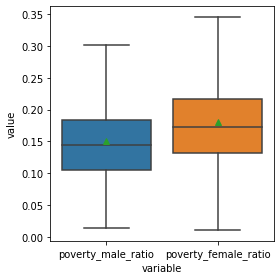

In [32]:

plt.figure(figsize=(4,4))
ax = sns.boxplot(x='variable', y='value', data=pd.melt(data[['poverty_male_ratio', 'poverty_female_ratio']]), showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()

In [33]:
data.value_counts(['more_females', 'more_females_poor'])

more_females  more_females_poor
1             1                    2199
0             1                     716
1             0                     117
0             0                     102
dtype: int64

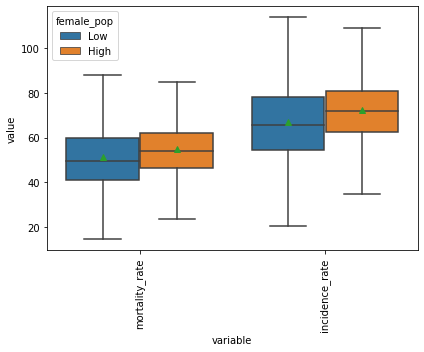

In [34]:

fem = data['female_ratio'].median()
data['female_pop'] = 'High'
data.loc[data['female_ratio']<fem,'female_pop']='Low'
plt.figure(figsize=(6,5))
i = 'female_pop'
rate2 = ['mortality_rate', 'incidence_rate']
x = pd.melt(data[rate2+ [i]], id_vars=i)
ax = sns.boxplot(x='variable', y='value', hue=i, data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

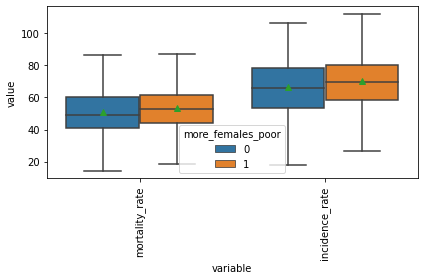

In [35]:

i = 'more_females_poor'
x = pd.melt(data[rate2+ [i]], id_vars=i)
ax = sns.boxplot(x='variable', y='value', hue=i, data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [36]:
## CATEGORISING POVERTY ACCORDING TO POVERTY RATTIO AND MEDIAN INCOME
median_pov_ratio = data['poverty_ratio'].mean()
median_med_income = data['median_income'].mean()
data['poverty_category']=None
data.loc[(data.median_income<median_med_income)&((data.poverty_ratio>median_pov_ratio)), 'poverty_category']='most_poor'
data.loc[(data.median_income>median_med_income)&((data.poverty_ratio>median_pov_ratio)), 'poverty_category']='many_poor_few_very_rich'
data.loc[(data.median_income<median_med_income)&((data.poverty_ratio<median_pov_ratio)), 'poverty_category']='few_very_poor_many_rich'
data.loc[(data.median_income>median_med_income)&((data.poverty_ratio<median_pov_ratio)), 'poverty_category']='many_rich'
data.poverty_category.value_counts()

most_poor                  1298
many_rich                  1237
few_very_poor_many_rich     463
many_poor_few_very_rich     135
Name: poverty_category, dtype: int64

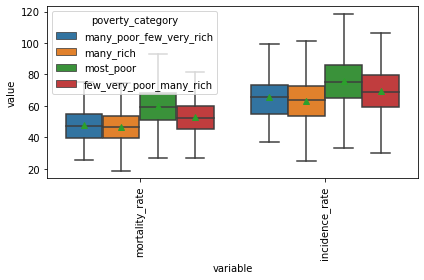

In [37]:
# PLOTTING MORTALITY AND INCIDENCE FOR ALL POVERTY CATEGORIES
i = 'poverty_category'
x = pd.melt(data[rate2+ [i]], id_vars=i)
ax = sns.boxplot(x='variable', y='value', hue=i, data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [38]:
#### CATEGORISING INSURANCE SUBSCRIPTIONS AMONG MALES AND FEMALES

data['female_insurance_rate'] = data['with_insurance_female']/(data['with_insurance_female']+data['without_insurance_female'])
data['male_insurance_rate'] = data['with_insurance_male']/(data['with_insurance_male']+data['without_insurance_male'])
median_male = data['with_insurance_male'].median()
median_female = data['with_insurance_female'].median()
data['insurance_ratios']=None
data.loc[(data.with_insurance_female<median_female)&((data.with_insurance_male>median_male)), 'insurance_ratios']='low_female_high_male'
data.loc[(data.with_insurance_female>median_female)&((data.with_insurance_male>median_male)), 'insurance_ratios']= 'high_female_high_male'
data.loc[(data.with_insurance_female<median_female)&((data.with_insurance_male<median_male)), 'insurance_ratios']='low_female_low_male'
data.loc[(data.with_insurance_female>median_female)&((data.with_insurance_male<median_male)), 'insurance_ratios']='high_female_high_male'
data['insurance_ratios'].value_counts()

high_female_high_male    1567
low_female_low_male      1547
low_female_high_male       20
Name: insurance_ratios, dtype: int64

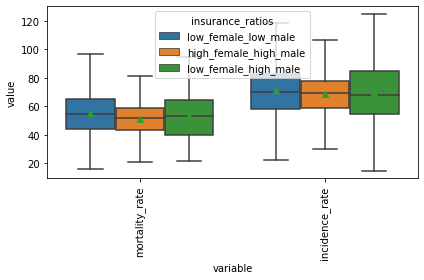

In [60]:
# plotting incidence/mortality for various insurance subscription categories
i = 'insurance_ratios'
rate2 = ['mortality_rate', 'incidence_rate']
x = pd.melt(data[rate2+ [i]], id_vars=i)
ax = sns.boxplot(x='variable', y='value', hue=i, data=x, showfliers=False, showmeans=True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

# Models

## Preparing Data: Handling Multicollinearity and Missing Values




In [40]:
###### HANDLING MULTICOLLINEARITY AND MISSING VALUES: dropping highly correlated features and missing values

corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
if 'mortality_rate' in to_drop:
  to_drop.remove('mortality_rate')

ind1 = data.drop(to_drop, axis=1)
ind = ind1.dropna() ##### dropped missing values after dropping dependent columns

X = ind.drop(['state', 'area_name', 'recent_trend', 'poverty_category', 'incidence_rate', 'mortality_rate', 'insurance_ratios', 'female_pop'], axis=1)
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)  # polynomial features dataset
X = X/X.max() # normalizing features
y1 = ind['incidence_rate'] ## dependent variable 1
y2 = ind['mortality_rate'] ## dependent variable 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


## Model-1: Num_Poverty Only

In [41]:
### using only num_poverty

X1_train, X1_val, y1_train, y1_val =  train_test_split(X, y1, test_size=0.2, random_state=0) ## splitting features and incidence with 80-20 split
X2_train, X2_val, y2_train, y2_val =  train_test_split(X, y2, test_size=0.2, random_state=0) ## splitting features and mortality with 80-20 split

features = ['num_poverty'] ## modelling using num_poverty only

reg1 = LinearRegression().fit(X1_train[features], y1_train) # training model for incidence
print("Train R2 score for incidence: ", reg1.score(X1_train[features], y1_train))

y1_pred = reg1.predict(X1_val[features]) #predictions
print("Test R2 score for incidence: ",r2_score(y1_val, y1_pred))

reg2 = LinearRegression().fit(X2_train[features], y2_train) # training model for mortality
print("Train R2 score for mortality: ",reg2.score(X2_train[features], y2_train))

y2_pred = reg2.predict(X2_val[features]) #predictions
print("Test R2 score for mortality: ",r2_score(y2_val, y2_pred))

Train R2 score for incidence:  0.043468459515555335
Test R2 score for incidence:  0.04803478128251515
Train R2 score for mortality:  0.05064381278187591
Test R2 score for mortality:  0.04514559314104383


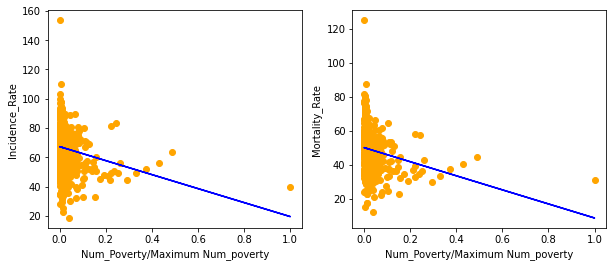

In [42]:
## plotting data and model learnt
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(X[features], y1, color = "orange")
ax[0].plot(X[features], reg1.predict(X[features]), color = "blue")
ax[0].set_xlabel("Num_Poverty/Maximum Num_poverty")
ax[0].set_ylabel("Incidence_Rate")

ax[1].scatter(X[features], y2, color = "orange")
ax[1].plot(X[features], reg2.predict(X[features]), color = "blue")
ax[1].set_xlabel("Num_Poverty/Maximum Num_poverty")
ax[1].set_ylabel("Mortality_Rate")
plt.show()

## Model-2: Using Poverty and Median Income

In [43]:
#### POVERTY AND MEDIAN INCOME
X1_train, X1_val, y1_train, y1_val =  train_test_split(X, y1, test_size=0.2,random_state=100)
X2_train, X2_val, y2_train, y2_val =  train_test_split(X, y2, test_size=0.2, random_state=100)
features = ['num_poverty', 'median_income']


reg1 = LinearRegression().fit(X1_train[features], y1_train)
print("Train R2 score for incidence: ", reg1.score(X1_train[features], y1_train))

y_pred = reg1.predict(X1_val[features])
print("Test R2 score for incidence: ",r2_score(y1_val, y_pred))

reg2 = LinearRegression().fit(X2_train[features], y2_train)
print("Train R2 score for mortality: ",reg2.score(X2_train[features], y2_train))

y_pred = reg2.predict(X2_val[features])
print("Test R2 score for mortality: ",r2_score(y2_val, y_pred))

Train R2 score for incidence:  0.17489984379982215
Test R2 score for incidence:  0.21216818505702295
Train R2 score for mortality:  0.20730851429790298
Test R2 score for mortality:  0.3043109589517241


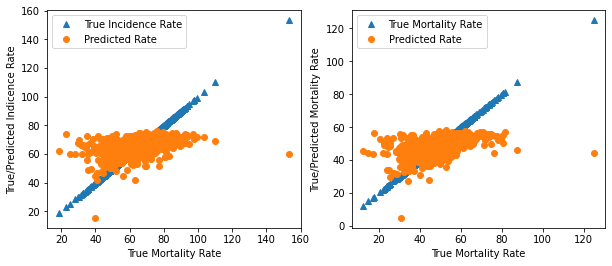

In [44]:
## plotting true value vs outcome
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(y1,y1, '^', label="True Incidence Rate")
ax[0].plot(y1,reg1.predict(X[features]), 'o', label = "Predicted Rate")
ax[0].set_xlabel("True Mortality Rate")
ax[0].set_ylabel("True/Predicted Indicence Rate")
ax[0].legend()

ax[1].plot(y2,y2, '^', label="True Mortality Rate")
ax[1].plot(y2,reg2.predict(X[features]), 'o', label = "Predicted Rate")
ax[1].set_xlabel("True Mortality Rate")
ax[1].set_ylabel("True/Predicted Mortality Rate")
ax[1].legend()

## Model-3: Using Polynomial Features

In [45]:
##### POLYNOMIAL FEATURES

X1_train, X1_val, y1_train, y1_val =  train_test_split(X_poly, y1, test_size=0.2,random_state=100)
X2_train, X2_val, y2_train, y2_val =  train_test_split(X_poly, y2, test_size=0.2, random_state=100)
reg1 = LinearRegression().fit(X1_train, y1_train)
print("Train R2 score for incidence: ", reg1.score(X1_train, y1_train))

y1_pred = reg1.predict(X1_val)
print("Test R2 score for incidence: ",r2_score(y1_val, y1_pred))

reg2 = LinearRegression().fit(X2_train, y2_train)
print("Train R2 score for mortality: ",reg2.score(X2_train, y2_train))

y2_pred = reg2.predict(X2_val)
print("Test R2 score for mortality: ",r2_score(y2_val, y2_pred))

Train R2 score for incidence:  0.6132645775812213
Test R2 score for incidence:  -0.9597010594645994
Train R2 score for mortality:  0.5058315836844318
Test R2 score for mortality:  -12.529605721188974


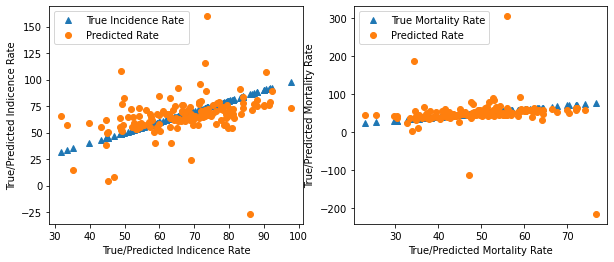

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(y1_val,y1_val, '^', label="True Incidence Rate")
ax[0].plot(y1_val,reg1.predict(X1_val), 'o', label = "Predicted Rate")
ax[0].set_xlabel("True/Predicted Indicence Rate")
ax[0].set_ylabel("True/Predicted Indicence Rate")
ax[0].legend()

ax[1].plot(y2_val,y2_val, '^', label="True Mortality Rate")
ax[1].plot(y2_val,reg2.predict(X2_val), 'o', label = "Predicted Rate")
ax[1].set_xlabel("True/Predicted Mortality Rate")
ax[1].set_ylabel("True/Predicted Mortality Rate")
ax[1].legend()

## Model-4: Using Engineered Features

In [47]:
#### USING ENGINEERED FEATURES

drop_features = ['black_income', 'asian_income_more', 'hispanic_income_more','num_groups_above_median', 'more_females_insured'] # removing features with p-value > 0.1
X1_train, X1_val, y1_train, y1_val =  train_test_split(X.drop(drop_features, axis=1), y1, test_size=0.2,random_state=100)
X2_train, X2_val, y2_train, y2_val =  train_test_split(X.drop(drop_features, axis=1), y2, test_size=0.2, random_state=100)
model = sm.OLS(y1_train, X1_train)
results = model.fit()
print(results.summary())
print("\n Test R2 score for mortality: ",r2_score(y1_val, results.predict(X1_val)))
y1pred = results.predict(X.drop(drop_features, axis=1))

                                 OLS Regression Results                                
Dep. Variable:         incidence_rate   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1344.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:50:00   Log-Likelihood:                         -2263.7
No. Observations:                 581   AIC:                                      4553.
Df Residuals:                     568   BIC:                                      4610.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [48]:
drop_features = ['black_income', 'asian_income_more', 'hispanic_income_more','num_groups_above_median', 'more_females_insured'] # removing features with p-value > 0.1
X1_train, X1_val, y1_train, y1_val =  train_test_split(X.drop(drop_features, axis=1), y1, test_size=0.2,random_state=100)
X2_train, X2_val, y2_train, y2_val =  train_test_split(X.drop(drop_features, axis=1), y2, test_size=0.2, random_state=100)
model = sm.OLS(y2_train, X2_train)
results = model.fit()
print(results.summary())
print("\n Test R2 score for mortality: ",r2_score(y2_val, results.predict(X2_val)))
y2pred = results.predict(X.drop(drop_features, axis=1))

                                 OLS Regression Results                                
Dep. Variable:         mortality_rate   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1066.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:50:00   Log-Likelihood:                         -2161.6
No. Observations:                 581   AIC:                                      4349.
Df Residuals:                     568   BIC:                                      4406.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

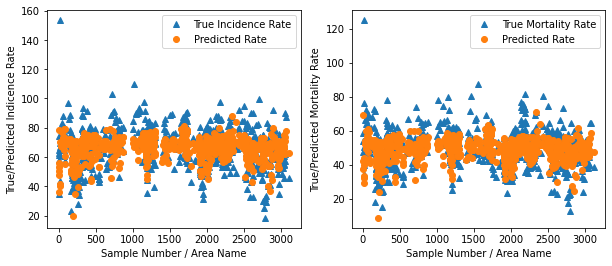

In [49]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(y1, '^', label="True Incidence Rate")
ax[0].plot(y1pred, 'o', label = "Predicted Rate")
ax[0].set_xlabel("Sample Number / Area Name")
ax[0].set_ylabel("True/Predicted Indicence Rate")
ax[0].legend()

ax[1].plot(y2, '^', label="True Mortality Rate")
ax[1].plot(y2pred, 'o', label = "Predicted Rate")
ax[1].set_xlabel("Sample Number / Area Name")
ax[1].set_ylabel("True/Predicted Mortality Rate")
ax[1].legend()